In [1]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
from parameter_estimation import plot_parameter
from tracking import batch, track

<Figure size 640x480 with 0 Axes>

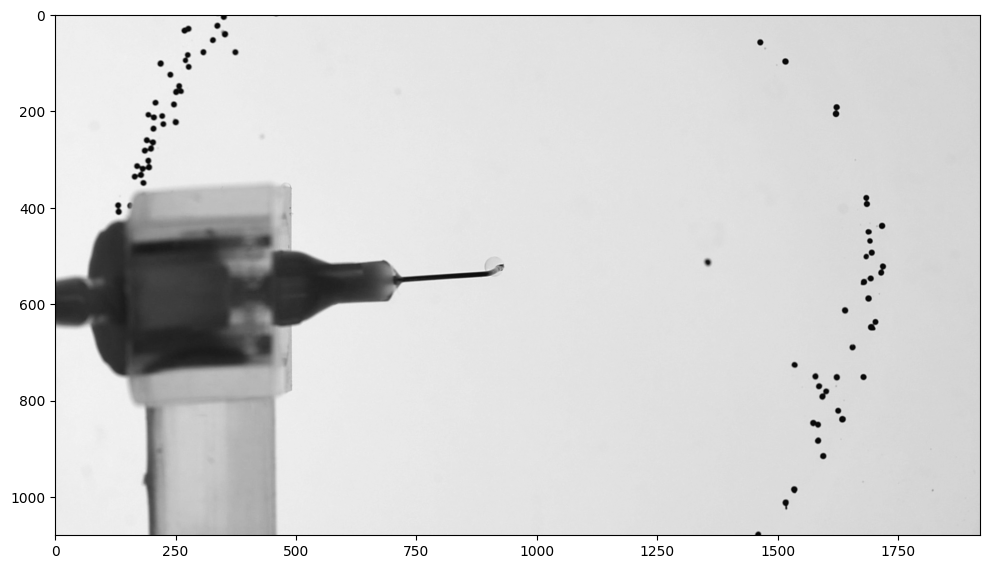

<Figure size 640x480 with 0 Axes>

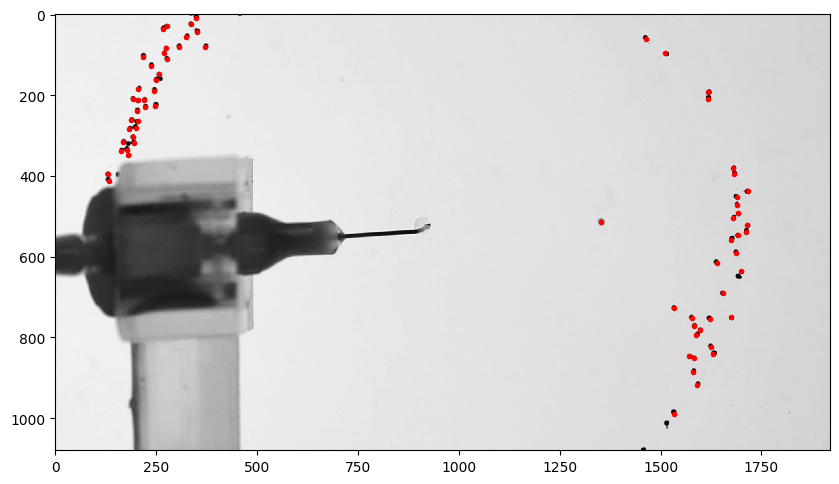

c:\Users\escud\Desktop\Marangoni\Code\marangoni-spreading\.venv\Lib\site-packages\trackpy\plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


<Figure size 640x480 with 0 Axes>

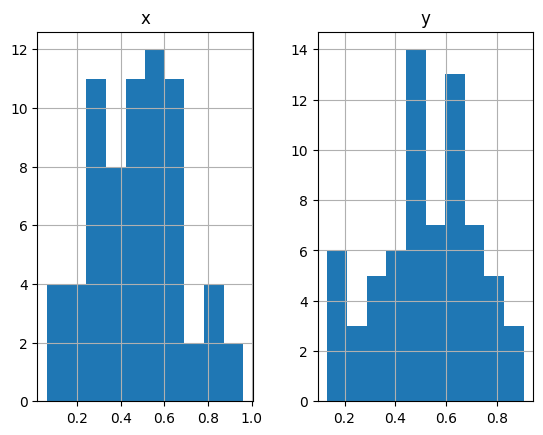

In [2]:
directory = "C:/Users/escud/Desktop/Marangoni/Videos/0225-Experiments/H=4cm_frames/"
last_frame = 300 # 640 is max for this video
diameter = 11
mass = 2200

frames = plot_parameter(directory, particle_diameter=diameter, particle_minmass=mass, frame_number=last_frame)

In [3]:
output_path = "C:/Users/escud/Desktop/Marangoni/Videos/0225-Experiments/H=4cm_frames_output/"
raw_frames = batch(frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, save_video=False, output_path=output_path)

Frame 299: 69 features


Frame 299: 69 trajectories present.


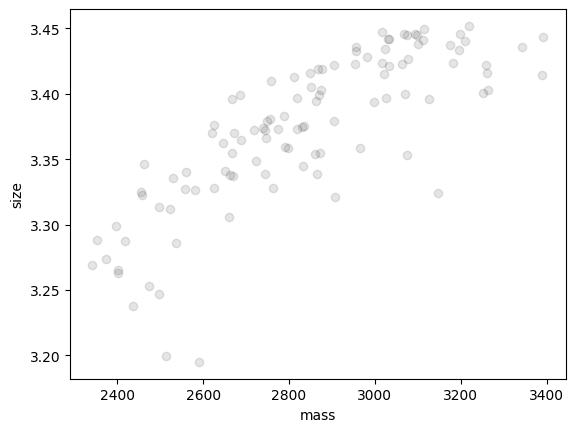

<Figure size 640x480 with 0 Axes>

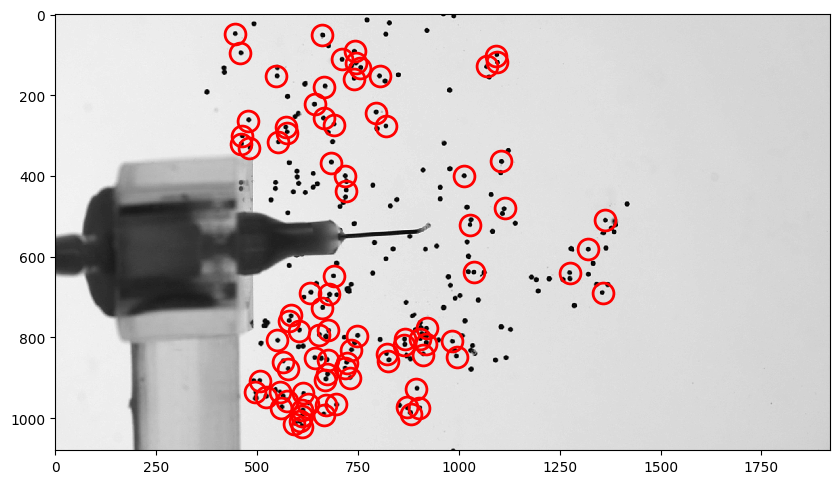

No-filter: 1660
Pre-filter: 108
Filter: 108


In [5]:
status = True
filtered_trajectories = track(batched_frames=raw_frames, frames=frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, filter_frame_number=150, save_video=status, output_path=output_path)

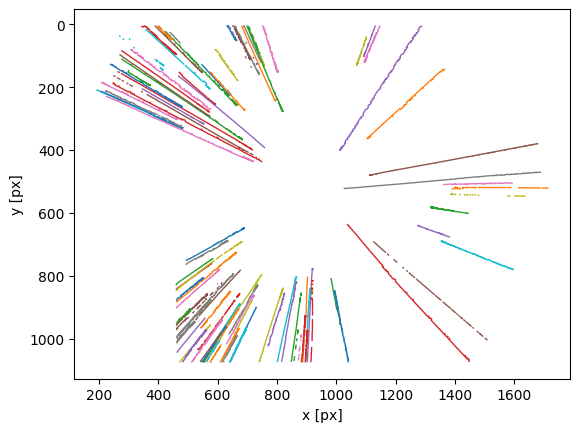

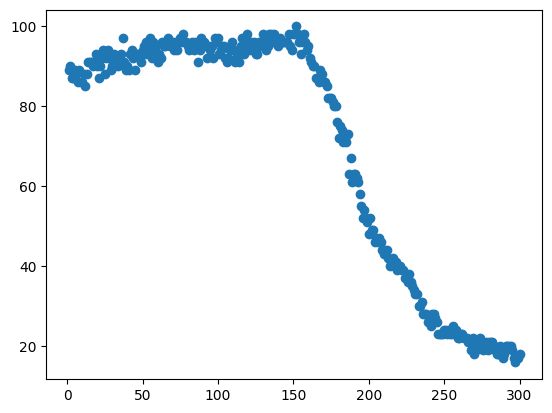

In [6]:
d = tp.compute_drift(filtered_trajectories)
tm = tp.subtract_drift(filtered_trajectories.copy(), d)
tm = filtered_trajectories ## ????
ax = tp.plot_traj(tm)
plt.show()

particles_per_frame = tm['frame'].value_counts().sort_index()
frame_number_array = np.linspace(1, len(particles_per_frame), len(particles_per_frame))
y_arr = tm['frame'].value_counts().sort_index()
plt.scatter(frame_number_array, y_arr)

Total trajectories found: 40


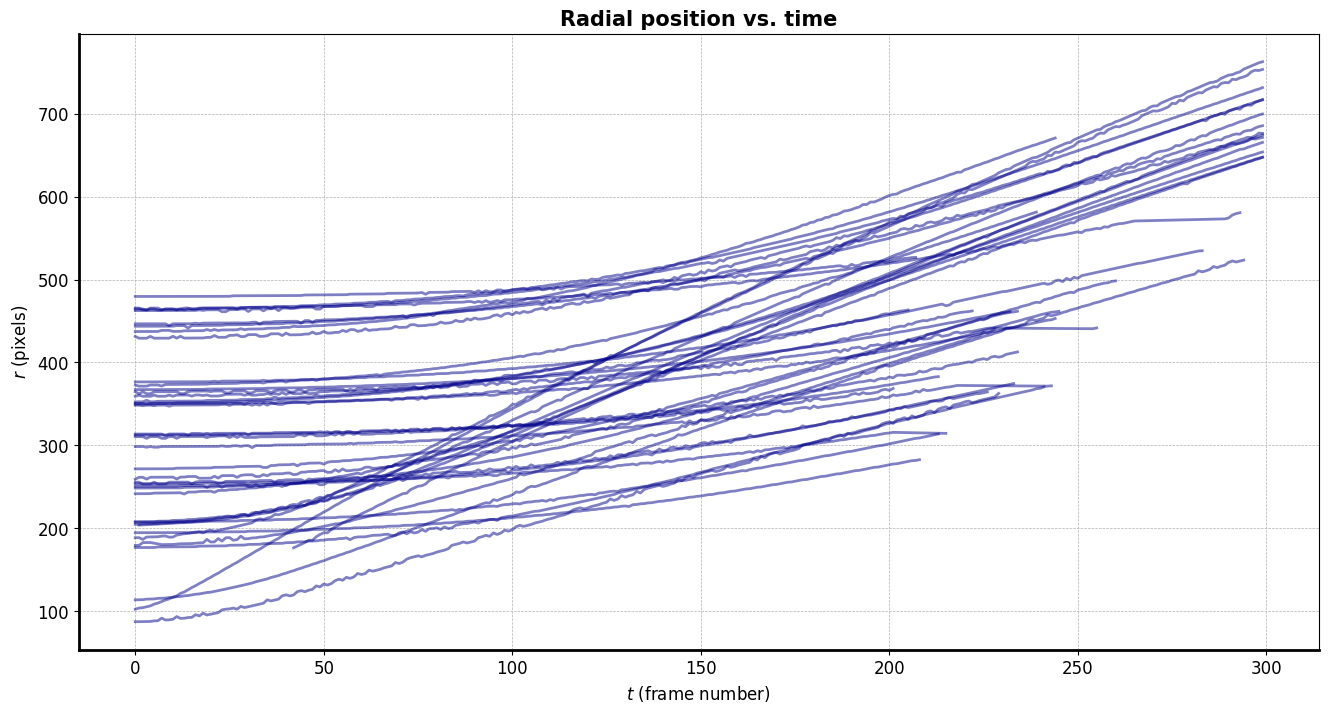

In [7]:
r_array_per_particle = []
x_c = 925 # determine empirically with ImageJ
y_c = 524 # determine empirically with ImageJ

# Group the DataFrame by the 'particle' column
for particle, group in filtered_trajectories.groupby('particle'):
    # Sort by frame to maintain the time order
    group_sorted = group.sort_values('frame')
    # Create a list of (x, y) tuples for the particle
    positions = list(zip(np.sqrt((group_sorted['x'] - x_c)**2, (group_sorted['y'] - y_c)**2), group_sorted['frame']))
    r_array_per_particle.append(positions)

u_array_per_particle = []
for i in r_array_per_particle:
    for j in range(len(i) - 1):
        u_array_per_particle.append([(i[j+1][0] - i[j][0])/(i[j+1][1] - i[j][1]), i[j][1]])


r_array_new = []
for i in r_array_per_particle:
    if len(i) > 200:
        r_array_new.append(i)

r_array_per_particle = r_array_new
plt.figure(figsize=(16, 8))

# Loop over each particle's data
for idx, particle_data in enumerate(r_array_per_particle):
    # Unzip the list of tuples into two separate lists:
    # r_values holds the radial positions (first element of each tuple)
    # frames holds the corresponding frame numbers (second element)
    if particle_data:  # Check if the list is not empty
        r_values, frames = zip(*particle_data)
        
        # Plot the radial positions against the frame numbers for this particle
        plt.plot(frames, r_values, label=f'Particle {idx}', color="darkblue", alpha=0.5, linewidth=2)
    
plt.xlabel(r'$t$ (frame number)', fontsize=12)
plt.ylabel(r'$r$ (pixels)', fontsize=12)
plt.title('Radial position vs. time', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

print(f'Total trajectories found: {len(r_array_per_particle)}')

In [ ]:
for i in r_array_per_particle:
    print(len(i))

236
235
242
206
223
214
234
209
227
233
235
245
221
203
230
214
202
295
300
244
300
300
300
224
300
289
230
284
261
239
218
300
300
300
300
300
300
207
271
258
40


In [ ]:
u_v_r = np.zeros(last_frame)
for i in u_array_per_particle:
    for j in range(len(i)):
        u_v_r[i[j][1]] = []



for idx, particle_data in enumerate(u_array_per_particle):
    # Unzip the list of tuples into two separate lists:
    # r_values holds the radial positions (first element of each tuple)
    # frames holds the corresponding frame numbers (second element)
    if particle_data:  # Check if the list is not empty
        u_values, frames = zip(*particle_data)
        
        # Plot the radial positions against the frame numbers for this particle
        plt.plot(frames, r_values, marker='o', label=f'Particle {idx}', color="darkblue", alpha=0.5, linewidth=2)

38


In [ ]:
def position_speed(position_array):
    speed_array = []
    for i in range(len(position_array) - 1):
        interim = []
        for j in range(len(position_array[i])):
            interim.append(position_array[i + 1][j] - position_array[i][j])
        speed_array.append(interim)
    return speed_array

speed_array = position_speed(r_array)
selection = np.linspace(40, counter_array[-3], 5, dtype=int)

plt.figure(figsize=(16, 8))
for i in selection:
    plt.scatter(r_array[i], speed_array[i], label='t = ' + str(i) + ' frames')
plt.legend()


plt.xlabel(r'$r$ (pixels)', fontsize=12)
plt.ylabel(r'$u_s$ (pixels/frame)', fontsize=12)
plt.title('Interface velocity vs. radial position', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# figure_directory = "C:/Users/escud/Desktop/Marangoni/Figures/D=60mm/"
# plt.savefig(figure_directory + "Speed_vs_radius_96_particles.jpeg", dpi=500, format='jpeg')
plt.show()

IndexError: list index out of range